<a href="https://colab.research.google.com/github/dmtrung14/pyTorch_fundamentals/blob/main/PyTorch_Fundamentals_NumPy_%26_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NumPy and PyTorch Workflow and More!

In [ ]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## PyTorch Reproducibility (Trying to take random out of random)
In short how a neural network learns: 

start with random numbers -> tensor oeprations -> update random numbers to try and make them better representations of the data -> again -> again -> again -> ...

To reduce the randomness in neural networks and PyTorch comes the concept of a *random seed*. 

... Or *pseudo-randomness*

In [ ]:
random_tensor_A = torch.rand(3,4)
random_tensor_B = torch.rand(3,4)
print(random_tensor_A)
print(random_tensor_B)
print(random_tensor_A == random_tensor_B)

tensor([[0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936],
        [0.8694, 0.5677, 0.7411, 0.4294]])
tensor([[0.8854, 0.5739, 0.2666, 0.6274],
        [0.2696, 0.4414, 0.2969, 0.8317],
        [0.1053, 0.2695, 0.3588, 0.1994]])
tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])


In [ ]:
# Random but reproducible tensors using seeds

import torch
RANDOM_SEED= 42
torch.manual_seed(RANDOM_SEED)
random_C = torch.rand(3,4)

torch.manual_seed(RANDOM_SEED)
random_D = torch.rand(3,4)

print(random_C, random_D, random_C == random_D)

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]]) tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]]) tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


## Running tensors and PyTorch objects on the GPUs (make faster computations)

GPUs = faster computation on numbers

# PyTorch Workflow

Let's explore an example end-to-end workflow.

Resources: 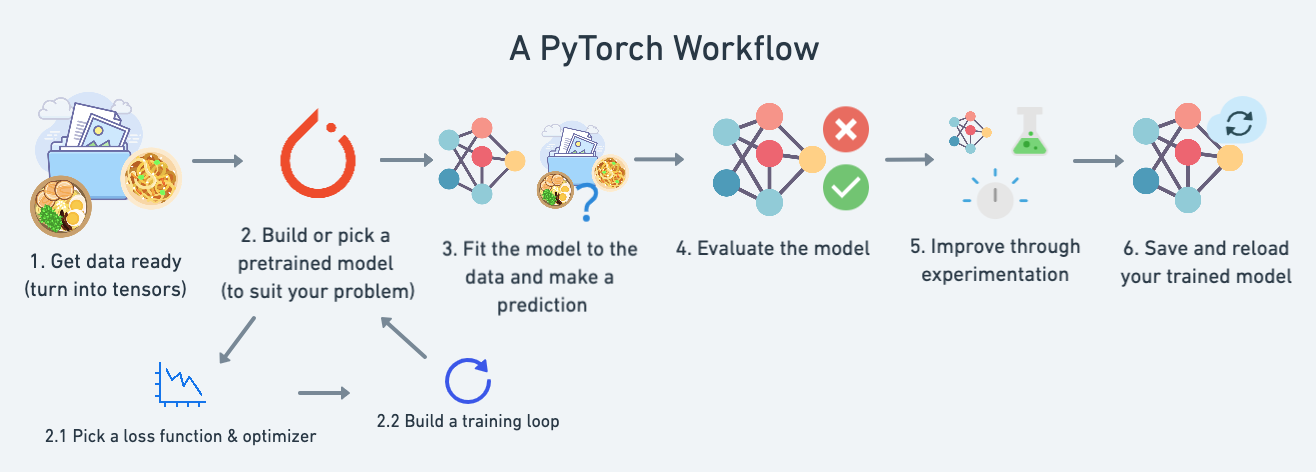

In [ ]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

#Check out PyTorch version
torch.__version__

'2.0.1+cu118'

## Data (preparing and loading)
Data can be almost anything in machine learning: spreadsheets, images, videos, sound tracks, DNA sequences, texts, etc.

--> Machine learning is a game of 2 parts: 
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation

To showcase this, let's create some *known* data using linear regression formula

In [ ]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
x = torch.arange(start, end, step).unsqueeze(dim =1)
y = weight * x + bias
x[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

Three datasets: 

Training set --> Validation set (tune model patterns) --> Test set (see if the model is ready for the wild)

Ideal splitting: 60 -20 -20 (%)

In [ ]:
# Create a train/test split
train_split = int(0.8 * len(x))
train_split
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split: ], y[train_split:]
len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data? Let's write a function to plot our data

In [ ]:
def plot_predictions(train_data = x_train, train_labels = y_train, test_data = x_test, test_labels = y_test, predictions = None):
  plt.figure(figsize= (10,7))
  plt.scatter(train_data, train_labels, c = "b", s =4, label = "Training data")
  plt.scatter(test_data, test_labels,c ="r", s=4, label= "Testing data")
  if predictions is not None:
    plt.scatter(test_data, predictions, c = "g", s= 4, label = "Predictions")
  
  #show the legend
  plt.legend(prop={"size": 14});
  

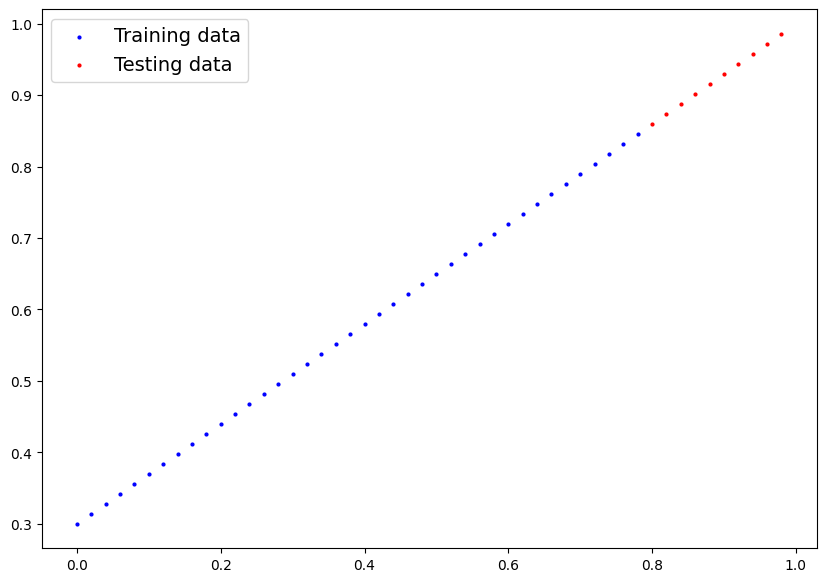

In [ ]:
plot_predictions();

## Create our first PyTorch model

Start with random values --> Look at training data and adjust the ranodm values to better represent (or get closer to) ideal values.

Two main algorithms: 
1. Gradient descent
2. Back propagation

In [ ]:
import re
import torch
from torch import nn
# Create a linear regression model class
class LinearRegressionModel(nn.Module):
    def __init__(self):
      super().__init__()
      # self.weights = nn.Parameter(torch.tensor(0, requires_grad = True, dtype = torch.float))
      self.weights = nn.Parameter(torch.randn(1, # <- Start with a random parameter and try to make it fit
                                              requires_grad = True, #<- it can be corrected with gradient descent
                                              dtype = torch.float)) # <- set the appropriate data type for uniformity
      self.bias = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float))

    #Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
      return self.weights * x + self.bias

## PyTorch model building essentials

* `Torch.nn` -contains all of the buildings for computational graphs (a neural network can be considered as a computational graph)
* `Torch.nn.Parameter` - what permeters shoudl our model try and learn, often a PyTorch layer from torch.nn will set these for us
* `Torch.nn.Module` - the base class for for all neural network modules, if you subclass it, you should overwrite `forward()`. 
* `forward()` computes the output based on input and parameters.


A few other helpful modules:

* `torch.optim`: contains various optimization algorithms (these tell the model paramters stored in nn.Parater how to best change to improve gradient descent and intern reduce the loss)
* `torch.utils.data.Dataset`: Represent a map between key and sample pairs of your data. Such as images and their associated labels
* `torch.utils.data.DataLoader` Creates a Python iterable over a torch Dataset.

### Checking the contents of our PyTorch model

 Now we've created a model, let's see what's inside...
 So we can check our model parameters or what's inside our model using `.parameters()`
 


In [ ]:
# Create a random seed
torch.manual_seed(42)

model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
#List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on`x_test`. 

When we pass data through our model, it's going to run it through the `forward()` method. 

In [ ]:
# Make predictions with model

with torch.inference_mode():
  y_preds = model_0(x_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

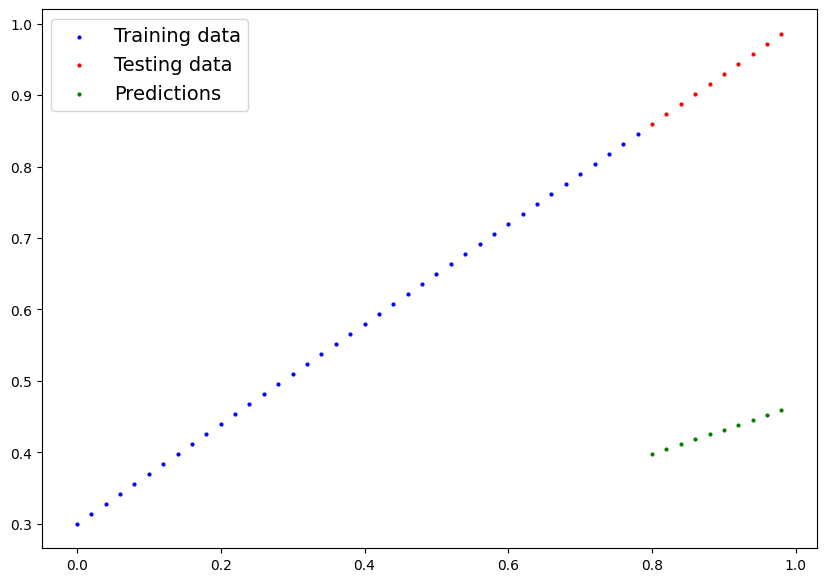

In [ ]:
plot_predictions(predictions = y_preds)

## Train model

The whole idea of training is for a mdoel to move from some **unknown** parameters to some *known* parameters. Or in other words, from a poor representation of the data to a better representation of the data

One way to measure how poor or how wrong your models predictions are is to use a loss function.

* Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.

Things we need to train:

* **Loss function** is a function to measure how wrong your model is from the real data.

* **Optimizer**: Takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias)
  * `params` - the model parameters you'd like to optimize, for example `params = model_0.paramters()`
  * lr (learning rate) -control how big/small of a step to take

Specifically for PyTorch, we need
* A training loop
* a testsing loop

In [ ]:
#Set up a loss function
loss_fn = nn.L1Loss()

loss_fn
#Set up an optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.01) # Stochastic Gradient Descent

## Building a training loop and a Testing loop in PyTorch

A couple of things we need in a training loop:
0. loop through the data
1. Forward pass (this involves data moving through our model's `forward()` functions - also forward propagation. 
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the paramters of our model with regard to the loss. (*backpropagation*)
5. Optimizer step (*gradient descent*)

In [ ]:
torch.manual_seed(42)
# An epoch is one loop through the data
epochs = 100


### Training
#0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch set all parameters that require gradient to True
  
  #1. Forward pass
  y_pred = model_0(x_train)

  #2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  #5. Step the optimizer
  optimizer.step()
  
  
  model_0.eval() # turns off gradient tracking
  with torch.inference_mode():
    #1. Do the forward pass
    test_pred = model_0(x_test)

    #2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)
    if epoch %10 == 0:
    
      print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")


print(model_0.state_dict(), loss)

Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
Epoch: 70 | Loss: 0.03476089984178543 | Test loss: 0.0805937647819519
Epoch: 80 | Loss: 0.03132382780313492 | Test loss: 0.07232122868299484
Epoch: 90 | Loss: 0.02788739837706089 | Test loss: 0.06473556160926819
OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))]) tensor(0.0248, grad_fn=<MeanBackward0>)


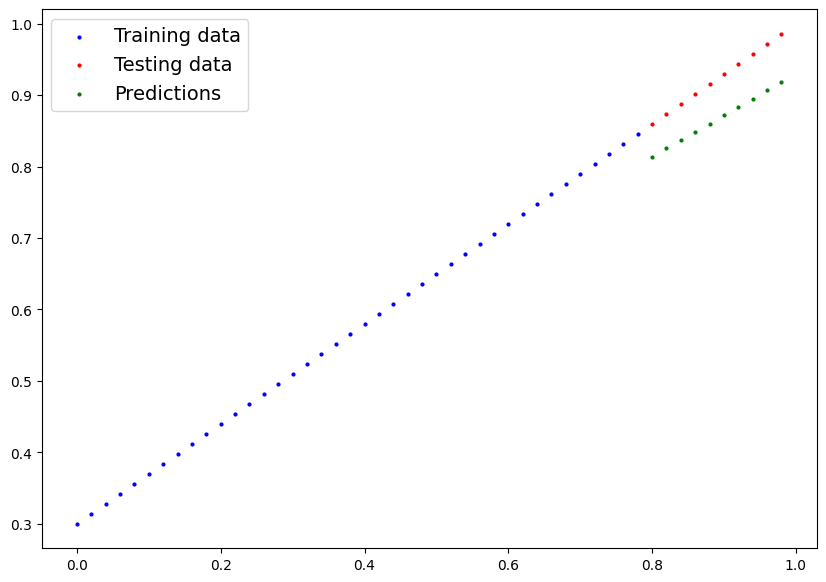

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(x_test)
plot_predictions(predictions=y_preds_new)

## Saving (and Loading) a model in PyTorch

There are three main methods you should about for saving and loading models in PyTorch.

1. `torch.save()` - allows you save a PyTorch object in Python's pickle format
2. `torch.load()` -allows you load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` -this allows to laod a model's saved state dictionary.

PyTorch save & load code: https://pytorch.org/tutorials/beginner/saving_loading_models.html




In [ ]:
from pathlib import Path

#1. Create models directory

MODEL_PATH = Path("Models")
MODEL_PATH.mkdir(parents = True, exist_ok =True)

# 2. Create model save path
MODEL_NAME = "PyTorchFundamentals_Workflow_model0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

#3. Save the model state dict
torch.save(obj = model_0.state_dict(), f= MODEL_SAVE_PATH)

Since we saved the `state_dict` rather than the entire model, we'll create a new isntance of our model class and load `state_dict()` into that

In [ ]:
#To load in a saved state_dict we have to instantitate a new instance of our model class
load_model_0 = LinearRegressionModel()

#Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
load_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))
load_model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

# Putting things all Together

Let's go back through the steps above and see it all in one place

In [ ]:
# Import PyTorch and matplotlib

import torch
from torch import nn
import matplotlib.pyplot as plt

#Create some kind of data

weight = 0.7
bias = 0.3
x_data = torch.arange(0, 1, 0.02)
y_data = x_data*weight + bias
training_portion = 0.8
upto = int(training_portion * len(x))
x_train = x_data[:upto]
y_train = y_data[:upto]
x_test = x_data[upto:]
y_test = y_data[upto:]

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = torch.nn.Parameter(torch.tensor(0.3, requires_grad = True, dtype = torch.float))
    self.bias = torch.nn.Parameter(torch.tensor(0.4, requires_grad = True, dtype = torch.float))
  def forward(self, x:torch.tensor) -> torch.tensor:
    return x*self.weight + self.bias

model_0 = LinearRegressionModel()

def L1Train(model, epochs, lr):
  loss_fn = torch.nn.L1Loss()
  optimizer = torch.optim.SGD(model.parameters(), 0.01)
  
  for epoch in range(epochs):
    #set model to training mode
    model.train()

    #1. calculate the forward propagation
    y_pred = model(x_train)

    #2. calculate the loss
    loss = loss_fn(y_pred, y_train)

    #3. Optimizer zero_grad
    optimizer.zero_grad()

    #4. Execute backpropagation
    loss.backward()

    #5. Optimizer take a step
    optimizer.step()
  model.eval()
L1Train(model_0, 50, 0.01)
model_0.state_dict()


OrderedDict([('weight', tensor(0.4073)), ('bias', tensor(0.4225))])

Passed!